<a href="https://colab.research.google.com/github/sakshamshil/Machine-Learning-Projects/blob/main/Medical%20Insurance%20Cost%20Prediction/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WORK FLOW**

Insurance Cost Data -> Data Analysis -> Data pre processing -> Train Test Split -> Linear Regression Model"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
insurance_data = pd.read_csv('/content/insurance.csv')

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_data.shape

(1338, 7)

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-50-da389027c249>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


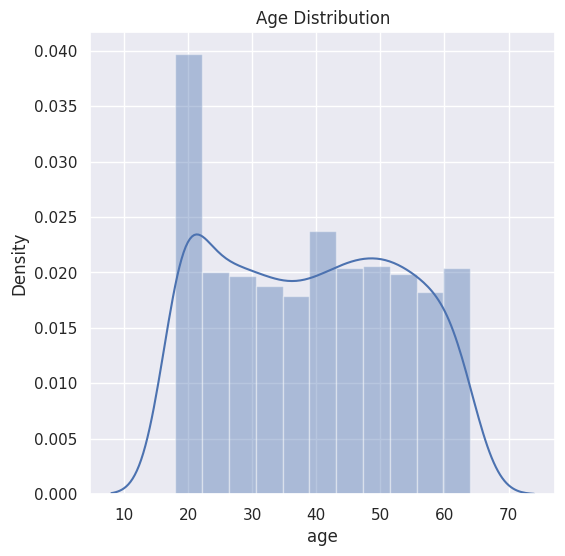

In [ ]:
#distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

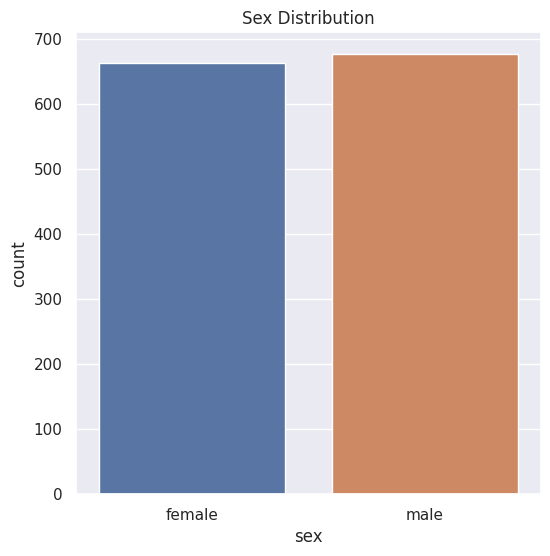

In [ ]:
#Gender Column
#sns.plot (don't need to mention it again)
plt.figure(figsize = (6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-53-9f2f120914ae>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


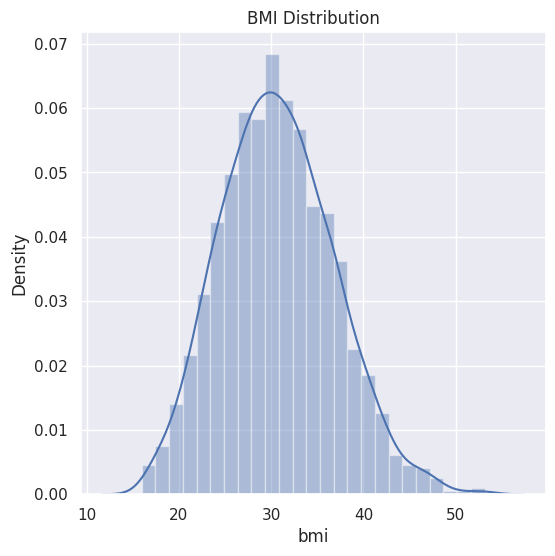

In [ ]:
#distribution of bmi value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

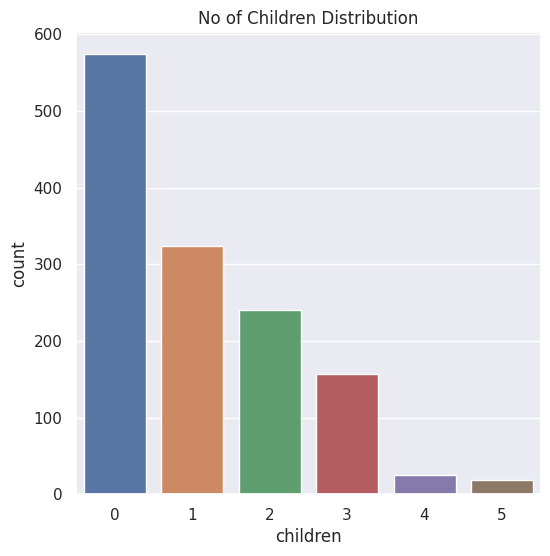

In [ ]:
#Kids Column
plt.figure(figsize = (6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('No of Children Distribution')
plt.show()

In [ ]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

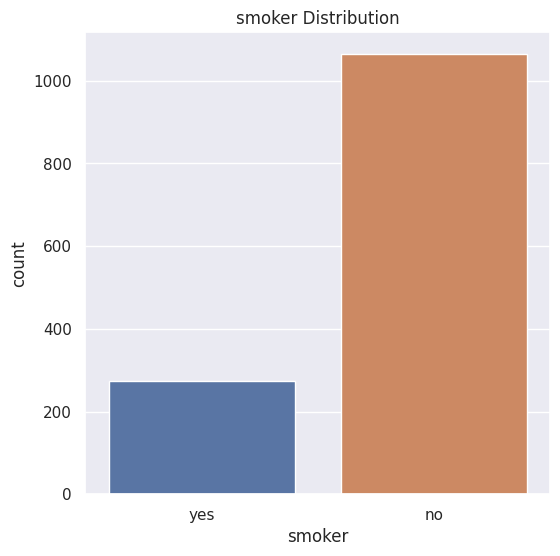

In [ ]:
#Smokers Column
plt.figure(figsize = (6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('smoker Distribution')
plt.show()

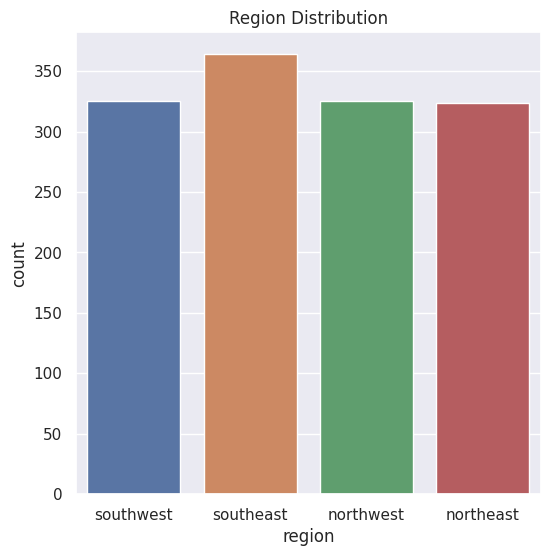

In [ ]:
#Region Column
plt.figure(figsize = (6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('Region Distribution')
plt.show()

In [ ]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-59-2360c3e1ba9f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


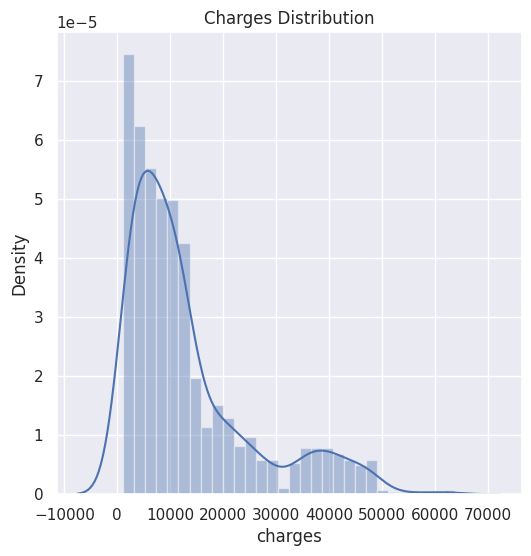

In [ ]:
#distribution of charges
plt.figure(figsize = (6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

###Converting categorical features into Numerical Values

In [ ]:
insurance_data.replace({'smoker' : {'no' : 0, 'yes' : 1}, "sex" : {'male' : 0 , 'female' : 1}, "region" : {'southeast' : 0,
                        'southwest' : 1, 'northeast' : 2, 'northwest' : 3} } , inplace = True)

In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


###Splitting the features and labels

In [ ]:
X = insurance_data.drop(columns = 'charges', axis = 1)
Y = insurance_data['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,2
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [ ]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

###Splitting into training and testing data

In [ ]:
X_train, X_test , Y_train, Y_test = train_test_split (X, Y, test_size = 0.2 , random_state = 2)

In [ ]:
print(X_train.shape, X_test.shape)

(1070, 6) (268, 6)


##Model Training

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

## ModelEvaluation

In [ ]:
training_prediction = model.predict(X_train)

#R squared value
r2_train = metrics.r2_score(Y_train, training_prediction)
print(r2_train)


0.751505643411174


In [ ]:
testing_prediction = model.predict(X_test)

#R squared value
r2_test = metrics.r2_score(Y_test, testing_prediction)
print(r2_test)


0.7447273869684076


###Building a predictive system

---



In [ ]:
#input_data = [19,female,27.9,0,yes,southwest]
input_data = [19,1,27.9,0,1,2]


input_data_np = np.asarray(input_data).reshape(1,-1)




prediction = model.predict(input_data_np)

print(prediction[0])



25809.96184075175


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
